Общий вывод:
- 11 мая доход сильно просел по источнику qt_mf (на 22%)
- К 16 мая доход вернулся на обычные значения
- Колчиество номеров и пользователей в сегменте изменилось не сильно, либо имеет колебанние вокруг среднего
- При этом сильно упал средний чек

Предоложения:
- 11 мая проводилась акция и пользователи стали платить меньше за те же товары
- В линейку товаров включили недоргой продукт который перетянул продажи на себя

In [139]:
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## Предобраотка данных

In [128]:
dt_truble = date(2023,5,11)
count_days_for_analys_one_way = 5
dt_start = datetime(2023,5,11) - timedelta(count_days_for_analys_one_way)
dt_end = datetime(2023,5,11) + timedelta(count_days_for_analys_one_way)
dt_start


datetime.datetime(2023, 5, 6, 0, 0)

In [117]:
def get_split_columns(df, column_name):
    df_filtr = (df.loc[(df[column_name]
                    .str.contains('^mf_|^oth_|^qt_mf_|^p1_')==True)])
    df_filtr[column_name] = (df_filtr[column_name].str.replace('qt_mf', 'qt-mf')
                                                  .str.replace('.csv', ''))
    df_filtr['split'] = df_filtr[column_name].str.split('_')
    df_filtr['source'] = df_filtr['split'].str[0]
    df_filtr['segment_date'] = df_filtr['split'].str[1]
    df_filtr['segment_name'] = df_filtr['split'].str[2]
    df_filtr['segment_count'] = df_filtr['split'].str[3]
    df_filtr.drop('split', axis=1, inplace=True)
    return df_filtr

In [202]:
df_click_income = pd.read_csv('click_income.csv', sep=';')
df_click_income['День'] = pd.to_datetime(df_click_income['День'], format='%Y-%m-%d')
df_click_income.rename({'Sub ID 7':'sub_id_7'}, axis=1, inplace=True )
df_click_income.rename({'Sub ID 6':'sub_id_6', 
                        'Sub ID 7':'sub_id_7',
                        'День':'date',
                        'Клики':'clicks',
                        'Уник. (поток)':'unq_users',
                        'Конв.':'conv',
                        'Доход (подтв.)':'income', 
                        'Продажи':'count_purch', 
                        'Аппрув %':'%appruve'}, axis=1, inplace=True)
df_click_income_split = get_split_columns(df_click_income, 'sub_id_7')
df_click_income_split = df_click_income_split.loc[(df_click_income_split['date'].between(dt_start, dt_end, 'both'))]
df_click_income_split['segment_count'] = df_click_income_split['segment_count'].astype('int')
df_click_income_split.info()
df_click_income_split.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4523 entries, 1 to 9891
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4523 non-null   datetime64[ns]
 1   sub_id_6       4523 non-null   object        
 2   sub_id_7       4523 non-null   object        
 3   clicks         4523 non-null   int64         
 4   unq_users      4523 non-null   int64         
 5   conv           4523 non-null   int64         
 6   income         4523 non-null   float64       
 7   EPC            4523 non-null   float64       
 8   count_purch    4523 non-null   int64         
 9   EC             4523 non-null   float64       
 10  CR             4523 non-null   float64       
 11  %appruve       4523 non-null   float64       
 12  source         4523 non-null   object        
 13  segment_date   4523 non-null   object        
 14  segment_name   4523 non-null   object        
 15  segment_count  4523 non-nu

,date,sub_id_6,sub_id_7,clicks,unq_users,conv,income,EPC,count_purch,EC,CR,%appruve,source,segment_date,segment_name,segment_count
1,2023-05-08,68648,mf_0405_50003_12689,1,1,1,5800.0,5800.0,1,5800.0,100.0,100.0,mf,0405,50003,12689
2,2023-05-13,67303,p1_2404_0-90sale6_6808,1,1,1,5800.0,5800.0,1,5800.0,100.0,100.0,p1,2404,0-90sale6,6808
5,2023-05-08,67115,qt-mf_2304_0-30lead4_4003,1,1,1,5800.0,5800.0,1,5800.0,100.0,100.0,qt-mf,2304,0-30lead4,4003
6,2023-05-08,68729,oth_0405_50002day_2945,1,1,1,5800.0,5800.0,1,5800.0,100.0,100.0,oth,0405,50002day,2945
11,2023-05-06,67672,qt-mf_2704_0-90sale1_16769,1,1,1,5800.0,5800.0,1,5800.0,100.0,100.0,qt-mf,2704,0-90sale1,16769


In [133]:
df_clicks_on_sms = pd.read_csv('clicks_on_sms.csv', sep=';')
df_clicks_on_sms['День'] = pd.to_datetime(df_clicks_on_sms['День'], format='%d.%m.%Y')
df_clicks_on_sms.drop([f'Unnamed: {n}' for n in range(5,11) ], axis=1, inplace=True)
df_clicks_on_sms.rename({'Sub ID 6':'sub_id_6', 
                         'Sub ID 7':'sub_id_7',
                         'День':'date',
                         'Клики':'clicks',
                         'Уник. (поток)':'unq_users'}, axis=1, inplace=True)
df_clicks_on_sms_split = get_split_columns(df_clicks_on_sms, 'sub_id_7')
df_clicks_on_sms_split = df_clicks_on_sms_split.loc[(df_clicks_on_sms_split['date'].between(dt_start, dt_end, 'both'))]
df_clicks_on_sms_split

,date,sub_id_6,sub_id_7,clicks,unq_users,source,segment_date,segment_name,segment_count
5000,2023-05-06,65037.0,mf_1004_50003day_7612,1,1,mf,1004,50003day,7612
5004,2023-05-06,21521.0,p1_2909_0-7retarget_5460,1,1,p1,2909,0-7retarget,5460
5005,2023-05-06,67116.0,qt-mf_2304_0-90sale4_17619,1,1,qt-mf,2304,0-90sale4,17619
5009,2023-05-06,66086.0,qt-mf_1704_0-5retarget1_8307,5,3,qt-mf,1704,0-5retarget1,8307
5010,2023-05-07,69100.0,mf_0705_50001_3419,39,36,mf,0705,50001,3419
...,...,...,...,...,...,...,...,...,...
24992,2023-05-15,70248.0,mf_1505_50003_13031_noclick_2023-05-15-07-50,1,1,mf,1505,50003,13031
24995,2023-05-16,69239.0,mf_0805_50002_6823,1,1,mf,0805,50002,6823
24996,2023-05-16,69778.0,qt-mf_1105_0-7click6_6466,5,4,qt-mf,1105,0-7click6,6466
24997,2023-05-14,64518.0,oth_0704_50005_14638,1,1,oth,0704,50005,14638


In [193]:
df_sms = pd.read_excel('sms.xls')
df_sms['День'] = pd.to_datetime(df_sms['День'], format='%d.%m.%Y')
df_sms.rename({'Примечание 1':'sub_id_6', 
               'Примечание 2':'sub_id_7',
               'День':'date',
               'Отправленные':'count_sent_sms',
               'Доставленные':'count_deliv_sms'}, axis=1, inplace=True)
df_sms_split = get_split_columns(df_sms, 'sub_id_7')
df_sms_split = df_sms_split.loc[(df_sms_split['date'].between(dt_start, dt_end, 'both'))]
df_sms_split['segment_count'] = df_sms_split['segment_count'].astype('int')
df_sms_split.info()
df_sms_split.head()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 624 to 1956
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             728 non-null    datetime64[ns]
 1   sub_id_6         728 non-null    int64         
 2   sub_id_7         728 non-null    object        
 3   count_sent_sms   728 non-null    int64         
 4   count_deliv_sms  728 non-null    int64         
 5   source           728 non-null    object        
 6   segment_date     728 non-null    object        
 7   segment_name     728 non-null    object        
 8   segment_count    728 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 56.9+ KB


,date,sub_id_6,sub_id_7,count_sent_sms,count_deliv_sms,source,segment_date,segment_name,segment_count
624,2023-05-06,69080,p1_0605_0-90sale6_6634,6379,6137,p1,0605,0-90sale6,6634
625,2023-05-06,69079,p1_0605_0-1click6_772,766,761,p1,0605,0-1click6,772
629,2023-05-06,69075,qt-mf_0605_0-90sale6_16196,15273,14705,qt-mf,0605,0-90sale6,16196
630,2023-05-06,69074,qt-mf_0605_0-30lead6_3523,3473,3303,qt-mf,0605,0-30lead6,3523
631,2023-05-06,69072,qt-mf_0605_0-7click6_6610,6545,6384,qt-mf,0605,0-7click6,6610


## Анализ

Text(0.5, 1.0, 'Суммарный доход по источникам')

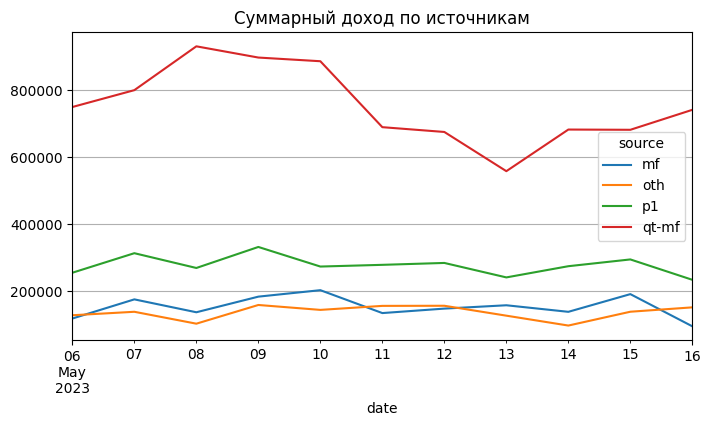

In [160]:
report = df_click_income_split.pivot_table(index='date', columns='source', values='income', aggfunc='sum')
report.plot(grid=True, figsize=(8,4))
plt.title('Суммарный доход по источникам')

In [169]:
print('Вывод: 11 мая общий доход просел по источнику qt_mf, на ',
      (((report['qt-mf']['2023-05-10'] - report['qt-mf']['2023-05-11']) / report['qt-mf']['2023-05-10']) * 100).round(1), 
      '%. Но к 16 маю доход восстановился')

Вывод: 11 мая общий доход просел по источнику qt_mf, на  22.2 %. Но к 16 маю доход восстановился


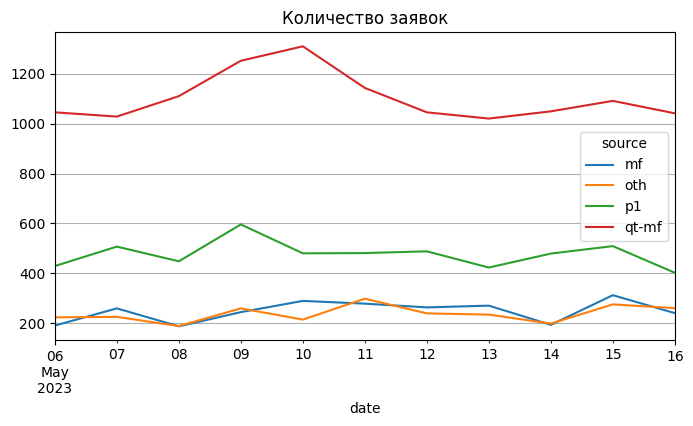

In [211]:
report = df_click_income_split.query('income>0').pivot_table(index='date', columns='source', values='conv', aggfunc='sum')
report.plot(grid=True, figsize=(8,4))
plt.title('Количество заявок');

Количество заявок имеет колебание вокруг среднего

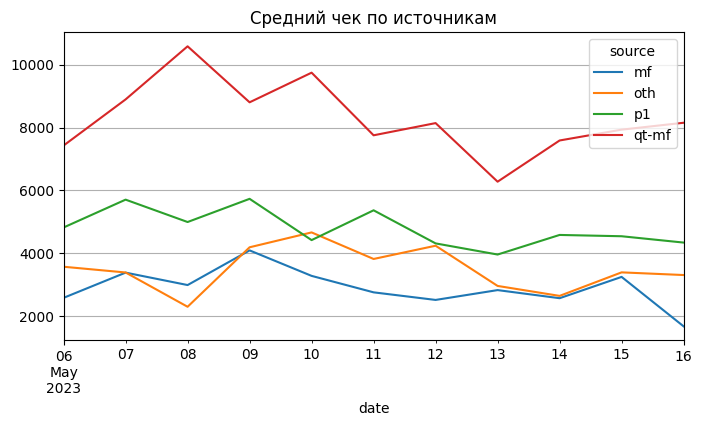

In [208]:
report = df_click_income_split.query('income>0').pivot_table(index='date', columns='source', values='income', aggfunc='mean')
report.plot(grid=True, figsize=(8,4))
plt.title('Средний чек по источникам');

Снизился средний чек по всем источникам

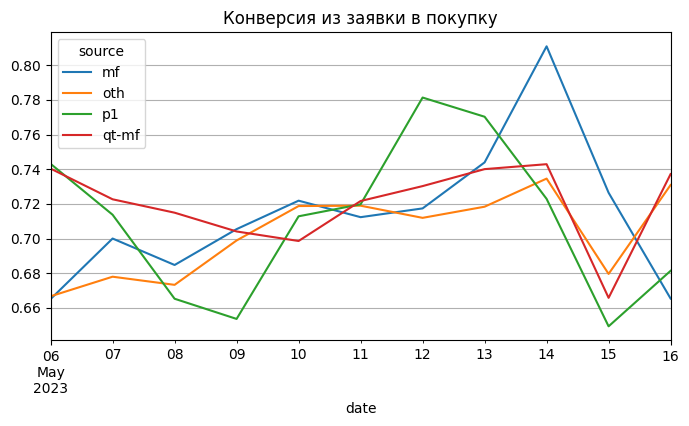

In [218]:
df_click_income_split_gr = df_click_income_split.groupby(['date', 'source'], as_index=False)[['conv', 'count_purch']].sum()
df_click_income_split_gr['cr_conv_to_purch'] = df_click_income_split_gr['count_purch'] / df_click_income_split_gr['conv']
df_click_income_split_gr = df_click_income_split_gr.pivot_table(index='date', columns='source', values='cr_conv_to_purch')
df_click_income_split_gr.plot(grid=True, figsize=(8,4))
plt.title('Конверсия из заявки в покупку');

Конверсия из заявки в покупку увеличилась

Text(0.5, 1.0, 'Суммарное количество номеров в сегменте')

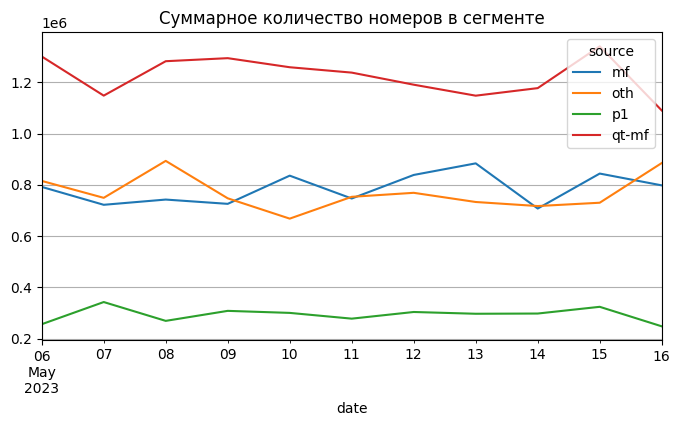

In [181]:
report = df_click_income_split.pivot_table(index='date', columns='source', values='segment_count', aggfunc='sum')
report.plot(grid=True, figsize=(8,4))
plt.title('Суммарное количество номеров в сегменте')

В сегменте количество номеров телефона для рассылки не изменилось

Text(0.5, 1.0, 'Количество уникальных пользователей в сегменте')

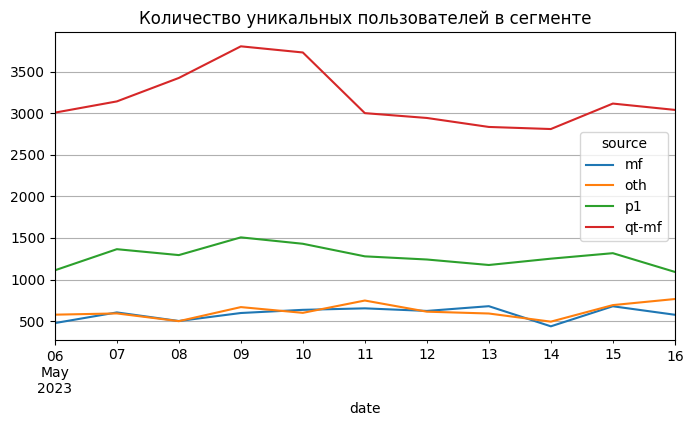

In [219]:
report = df_click_income_split.pivot_table(index='date', columns='source', values='unq_users', aggfunc='sum')
report.plot(grid=True, figsize=(8,4))
plt.title('Количество уникальных пользователей в сегменте')

Количество уникальных пользователей в проблемном сегменте имеет колебание вокруг среднего